In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [324]:
raw_data = pd.read_csv('data/fullsample.csv', parse_dates=['SUBMIT'])



In [325]:
raw_data=raw_data.drop_duplicates()

In [326]:
raw_data=raw_data[raw_data.CPUS!=0]

In [327]:
raw_data.ACCOUNT.nunique()

145

(4365379, 12)

In [376]:
clean_data=raw_data[raw_data.PARTITION=='production']

In [377]:
clean_data.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,SUBMIT
0,6794220,laxtons,mikala,247808Mn,115217.12M,14-00:00:00,11-01:32:50,1,16,production,0:0,2019-03-09 16:38:44
1,6983193_1880,discovery,serina,12288Mn,6516.10M,13-18:00:00,12-09:26:41,1,1,production,0:0,2019-03-07 18:39:59
2,7055502_1863,discovery,serina,12288Mn,0.09M,13-18:00:00,13-08:27:36,1,1,production,0:0,2019-03-11 10:06:06
3,7055502_1800,discovery,serina,12288Mn,8333.82M,13-18:00:00,12-03:50:59,1,1,production,0:0,2019-03-11 10:06:06
4,7055502_1806,discovery,serina,12288Mn,8304.03M,13-18:00:00,11-08:43:46,1,1,production,0:0,2019-03-11 10:06:06


only work with production data.

In [378]:

def time_in_seconds(ti):
    ti=ti.split('-')    
    if len(ti)==2:
        days=int(ti[0]) * 86400    
    else:
        days = 0       
    h,m,s = ti[-1].split(':')    
    hms = int(h)*3600 + int(m)*60 + int(s)       
    total_secs = days+hms 
    return total_secs     
    

In [379]:
clean_data['USEDTIME']=clean_data.USEDTIME.apply(time_in_seconds)
clean_data['REQTIME']=clean_data.REQTIME.apply(time_in_seconds)

/Users/sbussa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/sbussa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [380]:
clean_data=clean_data[clean_data.EXITCODE=='0:0']
clean_data.columns=clean_data.columns.str.lower()
clean_data['num_cpus']=clean_data.nodes/clean_data.cpus

In [381]:
def split_reqmem(x,y):
 
    if x[-2:]=='Mn':
        res = int(x.split('M')[0])*y
    elif x[-2:]=='Mc':
        res = int(x.split('M')[0])
         
    return res
 

In [382]:
clean_data['reqmem_mc']= clean_data.apply(lambda row:  split_reqmem(row['reqmem'], row['num_cpus']), axis = 1)

In [335]:
clean_data.usedmem.str[-1:].unique()

array(['M', '0'], dtype=object)

In [383]:
clean_data.usedmem=clean_data.usedmem.str.rstrip("M")

In [384]:
clean_data.usedmem=clean_data.usedmem.astype('float')

In [385]:
clean_data.reqmem_mc=clean_data.reqmem_mc.astype('float')

In [386]:
clean_data=clean_data[clean_data.nodes==1]

In [388]:
clean_data['usedmem_mc']=clean_data.usedmem*(clean_data.nodes/clean_data.cpus)

Cleaning is done. make a new dataset to start analysizing from the clean data set.

In [389]:
NewDf = clean_data[['jobid','account','user','reqmem_mc','usedmem_mc','reqtime','usedtime','submit','reqmem','usedmem','nodes','cpus']]

In [370]:
#calculating what percentage of requested memory is used 
NewDf['per_mem_usd']=(NewDf.usedmem_mc/NewDf.reqmem_mc)*100
 

/Users/sbussa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [374]:
percent_mem_used_grp=NewDf[['account','reqmem_mc','usedmem_mc','per_mem_usd']]

In [398]:
percent_mem_used_grp

,account,reqmem_mc,usedmem_mc,per_mem_usd
0,laxtons,15488.0,7201.07,46.494512
1,discovery,12288.0,6516.10,53.028158
2,discovery,12288.0,0.09,0.000732
3,discovery,12288.0,8333.82,67.820801
4,discovery,12288.0,8304.03,67.578369
5,discovery,12288.0,7693.11,62.606689
6,discovery,12288.0,7483.84,60.903646
7,discovery,12288.0,0.09,0.000732
8,discovery,12288.0,7945.69,64.662191
9,mickey,2048.0,2047.97,99.998535


In [420]:
qThree=percent_mem_used_grp.groupby('account').agg({'reqmem_mc': 'mean',
                                                     'usedmem_mc':'mean'}
                                                   ) 

3. What groups are best optimizing their memory usage in terms of percent of actual memory used of the memory requested for a job? What is the average percent for each group?

In [416]:
qThree


,reqmem_mc,usedmem_mc
account,,
alkmene,11553.681629,3550.096961
almonds,4593.089043,692.240520
amaranth,9409.086170,772.543185
antares,6040.981151,1165.408642
arra,9580.331210,3989.739413
atemoyas,2526.573784,244.347928
baby,1024.000000,2.744000
basil,10479.765854,1032.840902
bay,1706.666667,4.215694


In [421]:
qThree.reqmem_mc=qThree.reqmem_mc.round().apply(int)
qThree.usedmem_mc=qThree.usedmem_mc.round().apply(int)

In [422]:
qThree['per_mem_usd']= (qThree.usedmem_mc/qThree.reqmem_mc)*100

In [423]:
qThree=qThree.sort_values(by='per_mem_usd',ascending=False).head(50)

In [424]:
qThree = qThree.reset_index()

In [425]:
qThree

,account,reqmem_mc,usedmem_mc,per_mem_usd
0,blood,1024,1940,189.453125
1,shiny,15388,13863,90.089680
2,cep,18928,15768,83.305156
3,spring,10776,8696,80.697847
4,shell,14298,9287,64.953140
5,blackberries,4029,2332,57.880367
6,winged,15075,8389,55.648425
7,mixed,8061,4436,55.030393
8,large,1582,851,53.792668
9,opo,10240,5368,52.421875


In [426]:
#qThree['per_mem_usd']=qThree.usedmem_mc/qThree.reqmem_mc*100
qThree=qThree[qThree.per_mem_usd<=100]

In [427]:
qThree.per_mem_usd = qThree.per_mem_usd.round().apply(int)

/Users/sbussa/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [428]:
qThree=qThree.sort_values(by = 'per_mem_usd',ascending=False)
 
 

In [431]:
qThree=qThree.sort_values(by='per_mem_usd',ascending=False).head(10)

In [432]:
qThree

,account,reqmem_mc,usedmem_mc,per_mem_usd
1,shiny,15388,13863,90
2,cep,18928,15768,83
3,spring,10776,8696,81
4,shell,14298,9287,65
5,blackberries,4029,2332,58
6,winged,15075,8389,56
7,mixed,8061,4436,55
8,large,1582,851,54
9,opo,10240,5368,52
10,kinnow,15581,7710,49


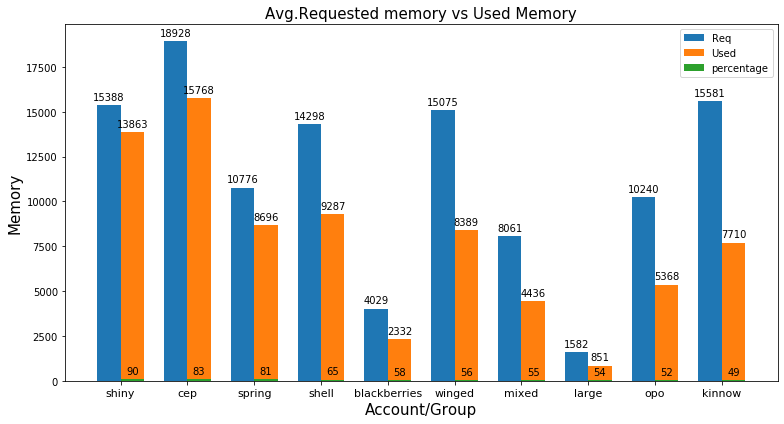

<Figure size 432x288 with 0 Axes>

In [438]:
labels = qThree.account
reqmem_mc_means = qThree.reqmem_mc
usedmem_mc_means = qThree.usedmem_mc
per_mem = qThree.per_mem_usd

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(11,6))
rects1 = ax.bar(x - width/2, reqmem_mc_means, width, label='Req',)
rects2 = ax.bar(x + width/2, usedmem_mc_means, width, label='Used')
rects3 = ax.bar(x+width/2,per_mem,width , label = 'percentage')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Memory',fontsize=15)
ax.set_xlabel('Account/Group',fontsize=15)
ax.set_title('Avg.Requested memory vs Used Memory',fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=11)
ax.legend()
 


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout();
plt.show();
 
plt.savefig('MemoryUsg.png', dpi = 250);

In [ ]:
percent_mem_used_grp.groupby('account')['per_mem_usd'].mean().sort_values(ascending=False)

In [ ]:
#find the average of per_mem_used by group
Avg_mem_used_grp=NewDf.groupby('account')['per_mem_usd'].mean()
Avg_mem_used_grp.sort_values(ascending=False)

In [ ]:
NewDf['wt_per_used_mem'] =  NewDf.per_mem_usd*NewDf.usedtime

In [ ]:
per_wtmem_used_grp=NewDf[['account','reqmem_mc','wt_per_used_mem']]

In [ ]:
per_wtmem_used_grp.head()

In [ ]:
qfour=per_wtmem_used_grp.groupby('account').agg({'reqmem_mc': 'mean',
                                            'wt_per_used_mem':'mean'}
                                           ).sort_values(by='wt_per_used_mem' ,ascending = False)

In [ ]:
qfour.head()

In [ ]:
qfour.reqmem_mc=qfour.reqmem_mc.round().apply(int)
qfour.usedmem_mc=qfour.usedmem_mc.round().apply(int)
qfour.per_mem_usd = qfour.per_mem_usd.round().apply(int)

<b>
4.Optimizing memory is more important for longer running jobs then shorter running jobs as the resources are tied up for longer. If jobs are weighted by runtime, what is the average percent of memory used of the requested memory for each group?
<b\>    

In [ ]:
qfour.sort_values(by='wt_per_used_mem',ascending=False)

In [ ]:
qThree[qThree.per_mem_usd<=100]

In [ ]:
#find the average weighted memory used in respect to the requested memory
Ave_Wtmem_used = NewDf.groupby(['account'])['wt_per_used_mem'].sum()/NewDf.groupby('account')['usedtime'].sum()

In [ ]:
Ave_Wtmem_used

In [ ]:
Ave_Wtmem_used.head(10).plot(kind='bar',figsize=(11,5))
 
plt.xlabel('Account')
plt.ylabel('Weighted Memory');
plt.title('Weighted Memory usage');


In [ ]:
NewDf.account.nunique()

<b>
3. Are any of these short jobs failing, i.e. exit code not “0:0”? If large arrays of jobs are failing quickly, it indicates that users are not debugging their jobs well before large scale submissions.
Ans: There are no failing jobs for large arrays.
<b/>
    

In [ ]:
short_jobs_failing=raw_data[raw_data.EXITCODE!='0:0'].sort_values(by='USEDTIME')

In [ ]:
short_jobs_failing.JOBID.unique()

In [ ]:
clean_data.head()

<b>
1.We strongly discourage users from running large numbers (>500) of very short ( < 5 mins) jobs within 4 hours. Are there any users who are repeat offenders?

For the questions regarding users submitting a lot of small jobs, Eric is interested in two aspects (although it is not clear from the README):
○ Lot of small jobs submitted together as an array (less difficult)
○ Lots of small jobs submitted together within a 4-hour window,
regardless of whether or not they were in an array (hard mode)<b/>

In [ ]:
df_small_jobs=clean_data[clean_data.usedtime<300].groupby(['user','submit']).count()

In [ ]:
df_small_jobs

In [ ]:
df_small_jobs=df_small_jobs.reset_index()

In [ ]:
df_small_jobs.head()

In [ ]:
df_small_jobs=df_small_jobs.set_index('submit')

In [ ]:
df_small_jobs_4hrs=df_small_jobs.groupby('user').rolling(window='4H').jobid.sum().reset_index()

In [ ]:
bad_users=  df_small_jobs_4hrs[ df_small_jobs_4hrs['jobid']>500]

In [ ]:
bad_users

In [ ]:
bad_users.groupby('user').jobid.max().sort_values(ascending=False)

In [ ]:
bad_users.user.unique()

In [ ]:
df_small_jobs_lessthanFive=clean_data[clean_data.usedtime<300] 

In [ ]:
df_small_jobs_lessthanFive

In [ ]:
#df_small_jobs_lessthanFive.groupby('user').count().sort_values(by='jobid',ascending=False)